In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import glob 

from Datasets.DSB18 import plot_img, Nuclie_data
from torch.utils.data import random_split, DataLoader, dataset

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
points = np.array([17,19, 34,7, 64,7, 86,18, 92,48, 76,35, 72,51, 51,67, 43,43, 34,44, 23,57, 18,78, 7,82, 2,35]).reshape(-1, 2)
x=points[:,0]*280
y=points[:,1]*280



In [ ]:
# train a convolutional neural network for segmentation
class unet(nn.Module):  

    def __init__(self, n_channels=3, n_classes=1, bilinear=True):
        super(unet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 512)
        self.up1 = Up(1024, 256)
        self.up2 = Up(512, 128)
        self.up3 = Up(256, 64)
        self.up4 = Up(128, 64)
        self.outc = OutConv(64, n_classes)
        
    def forward


# splprep
This function computes the best curve of degree K, that fits the data (x, y)

We use it here juste to compute the control points of the curve (given that we only have actual points from a polygone)

TCK is the curve representation : T -> 

In [3]:
tck,u = interpolate.splprep([x, y],k=3,s=0, per=1)
u=np.linspace(0,1,num=100,endpoint=True)
out = interpolate.splev(u,tck)

C:\Users\mbenimam\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][14]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\mbenimam\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[1][14]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


In [4]:
fig = plt.figure(figsize=(7, 5))
plt.title('B-Spline Evaluation')

x, y = tck[1]

cp = plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
line, = plt.plot([],[], 'bo-')
plt.legend(['Control Points', 'Discrete B spline', 'True'],loc='best')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    u3=np.linspace(0,1,i+1,endpoint=True)
    out = interpolate.splev(u3,tck)
    
    line.set_data(out[0], out[1])
    return line,
 
ani = FuncAnimation(fig, animate, init_func=init, frames=100, blit=True, interval=20, repeat=True)
plt.close()
ani.save("animation.mp4")
HTML(ani.to_html5_video())

Text(0.5, 1.0, 'phaseContrast')

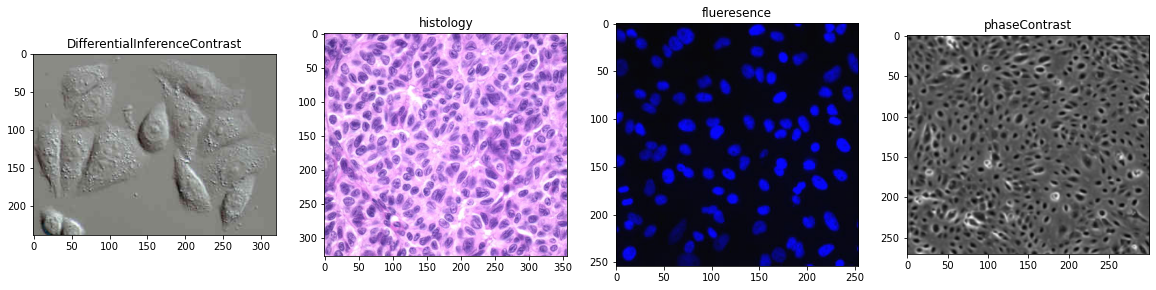

In [5]:
fig = plt.figure(figsize=(20, 12))

plt.subplot(141)
plt.imshow(plt.imread("DifferentialInferenceContrast.jpg"))
plt.title("DifferentialInferenceContrast")

plt.subplot(142)
plt.imshow(plt.imread("histology.PNG"))
plt.title("histology")

plt.subplot(143)
plt.imshow(plt.imread("flueresence.jpg"))
plt.title("flueresence")

plt.subplot(144)
plt.imshow(plt.imread("phaseContrast.PNG"))
plt.title("phaseContrast")



In [23]:
data = Nuclie_data("../Datasets/DSB18/train")
len(data)

670

In [24]:

trainset, valset = random_split(data, [580, 90])

train_loader = DataLoader(dataset=trainset, batch_size=10, shuffle=True)

val_loader = DataLoader(dataset=valset, batch_size=10)

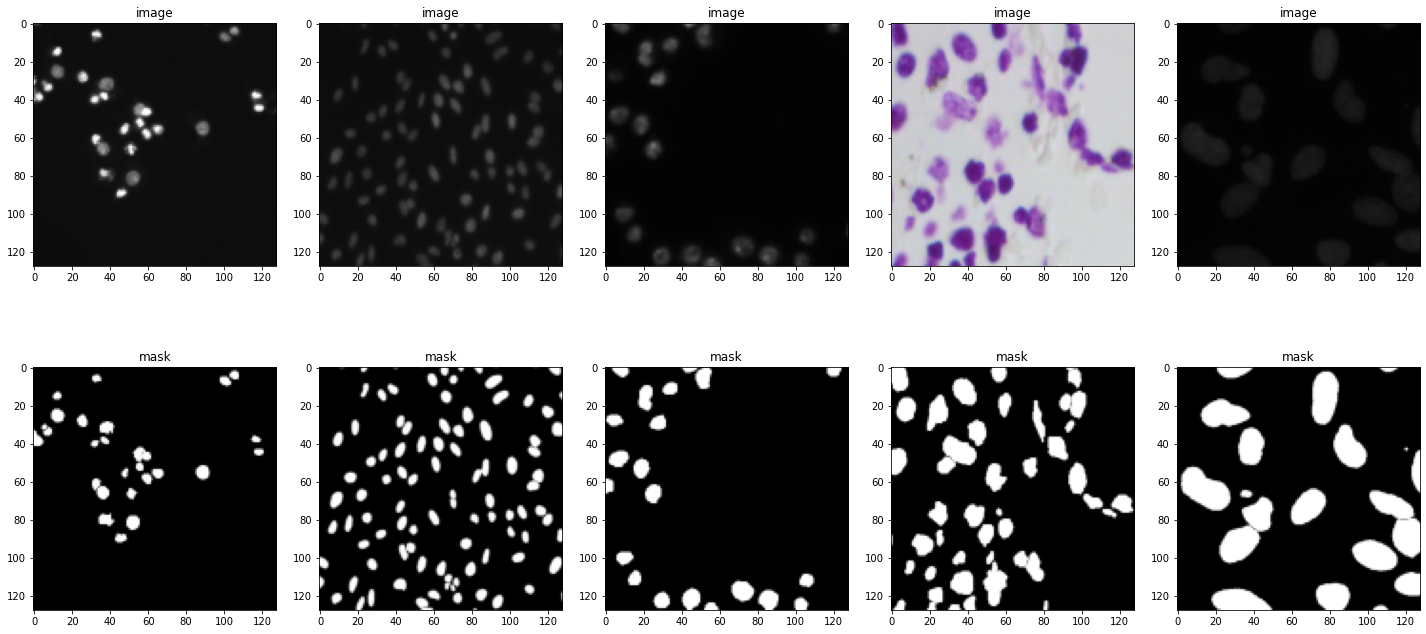

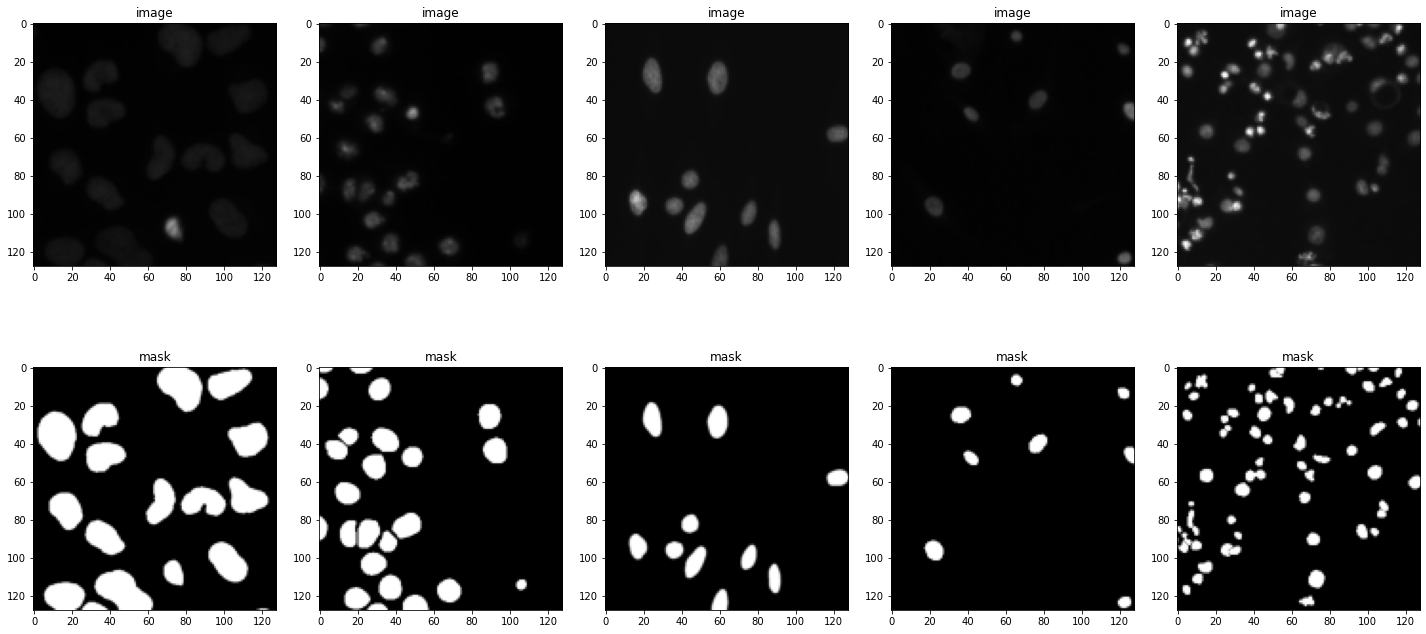

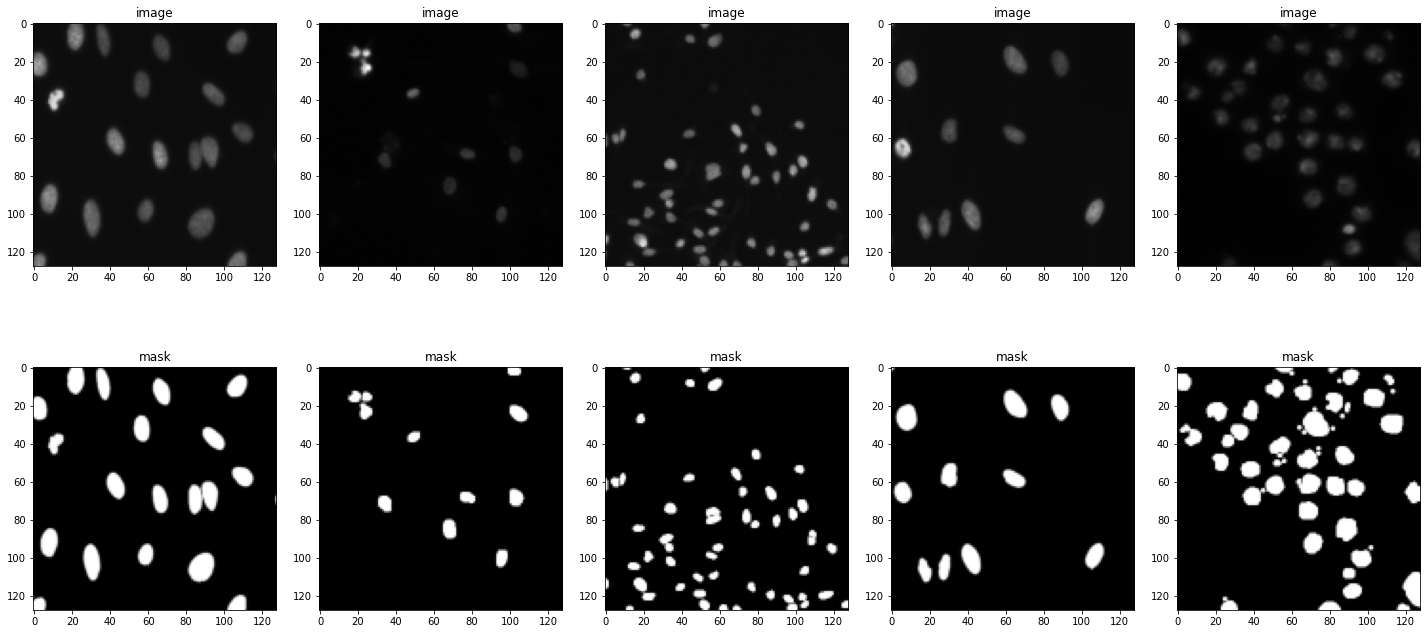

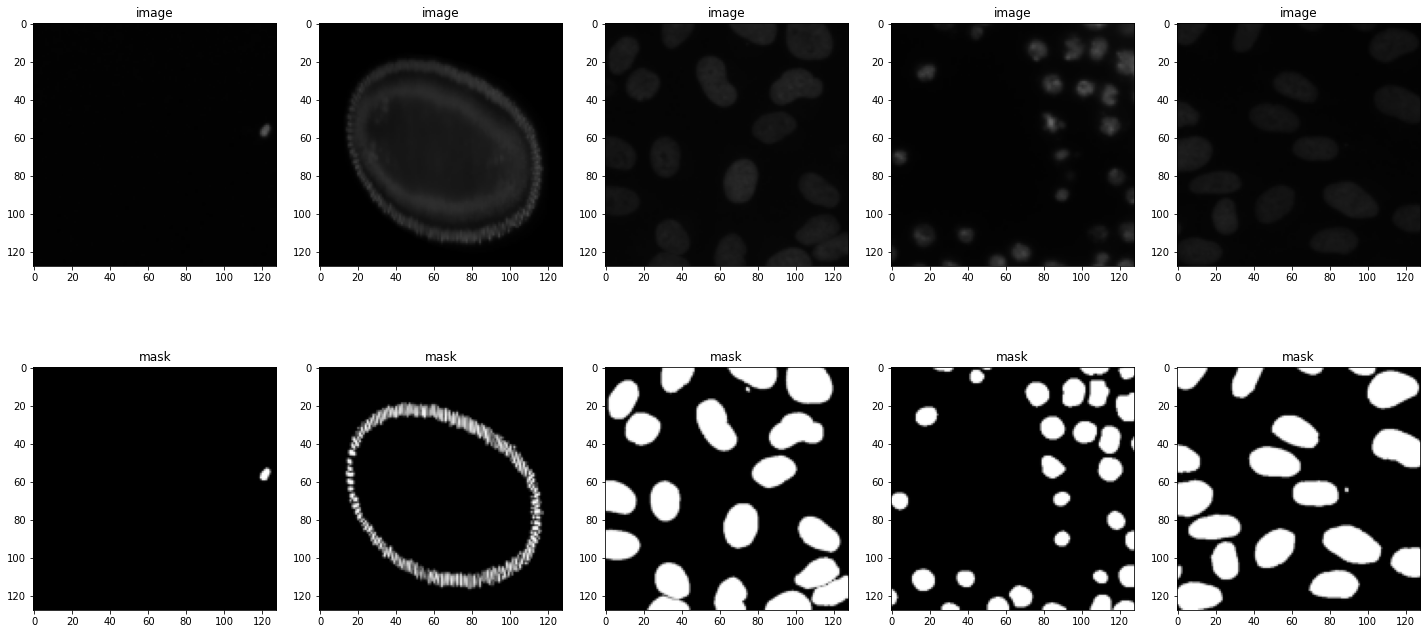

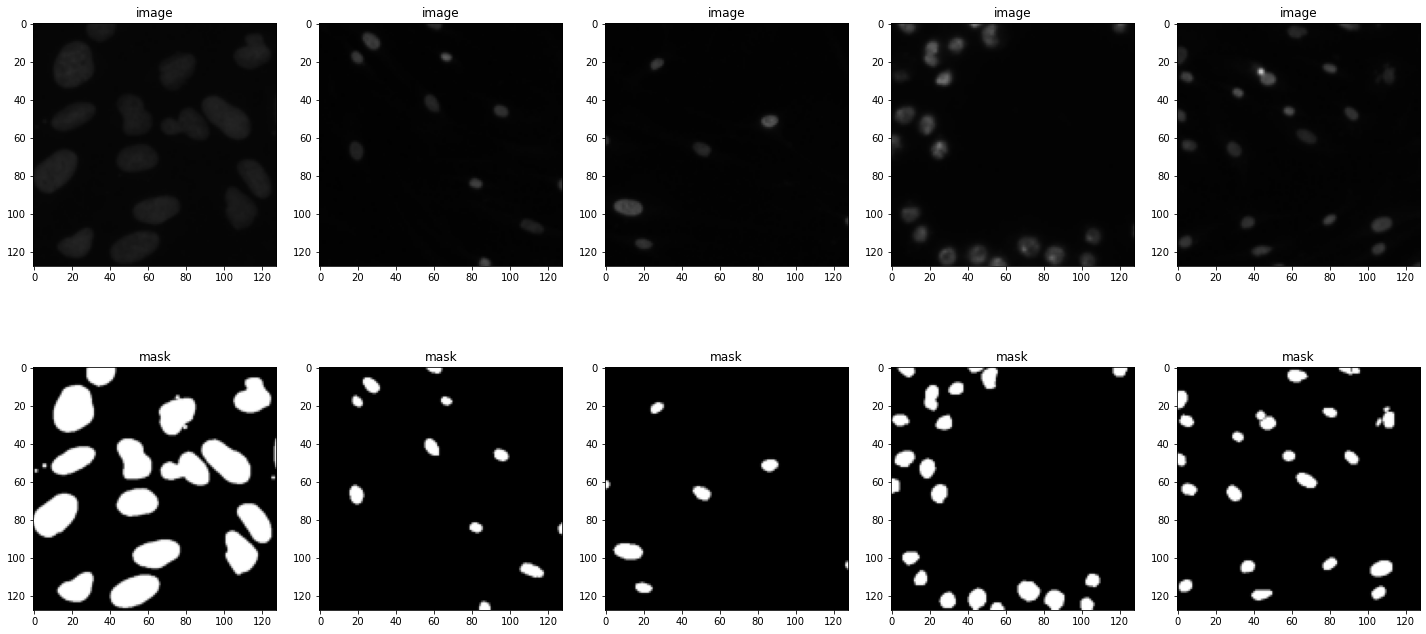

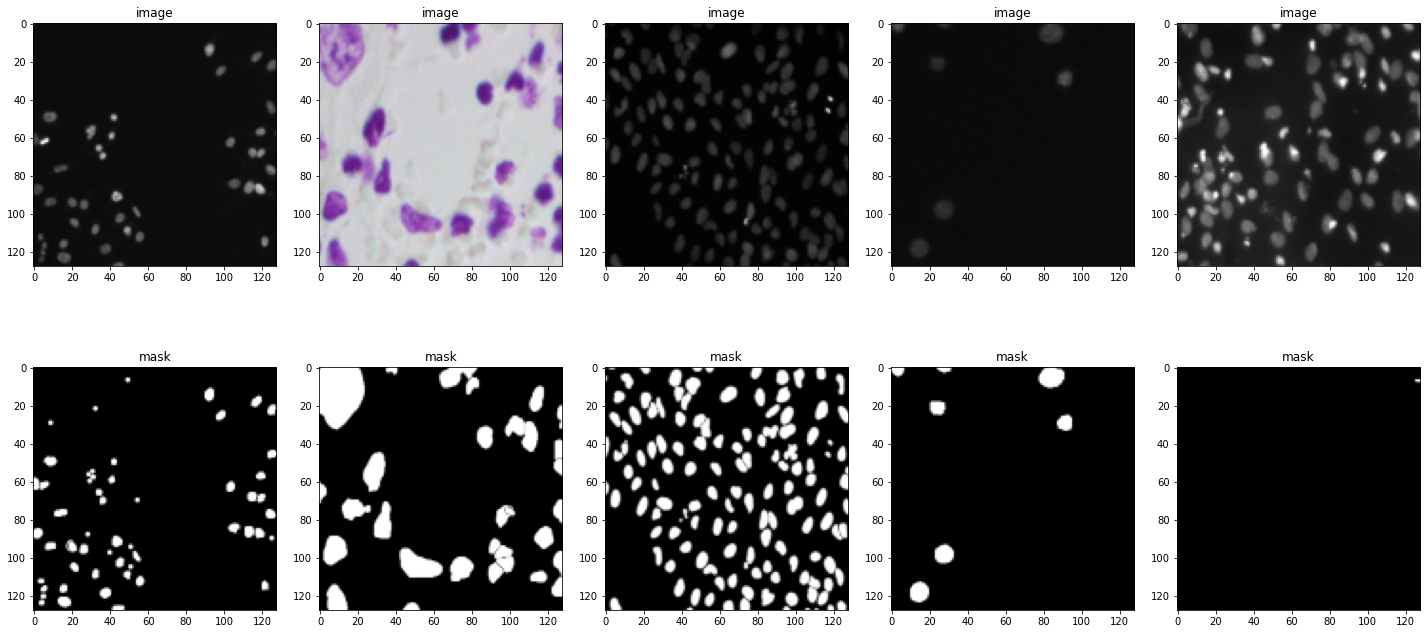

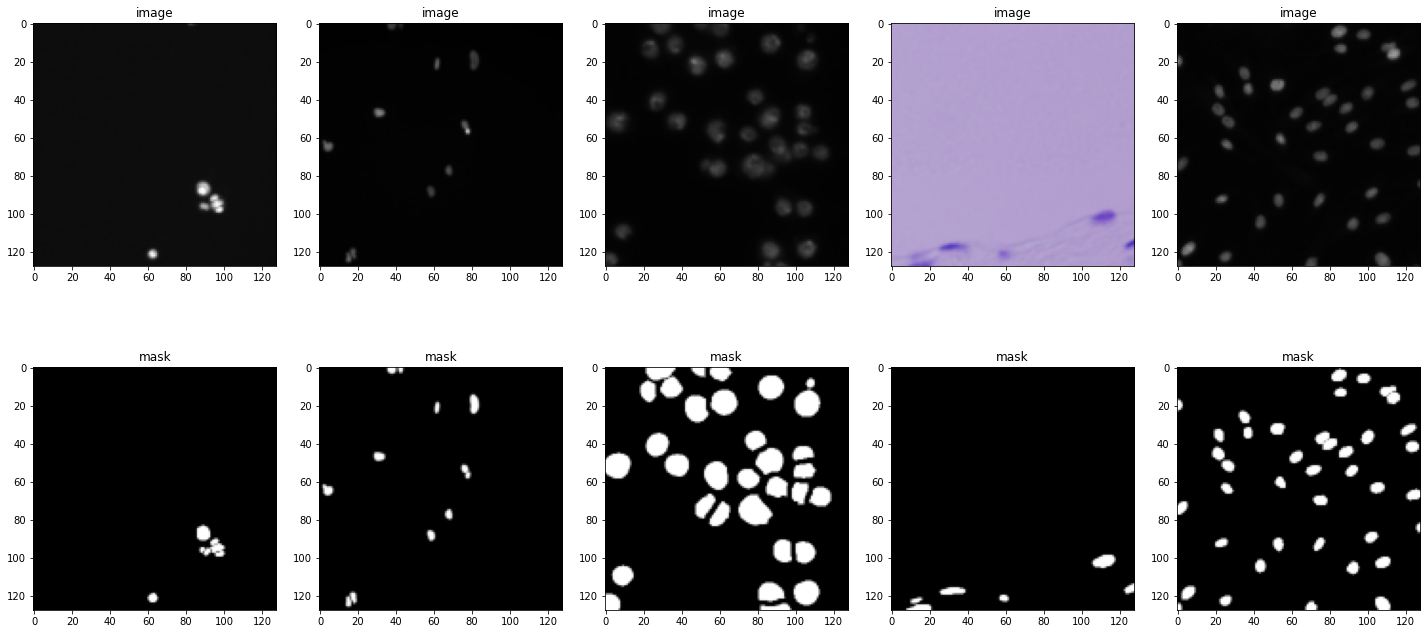

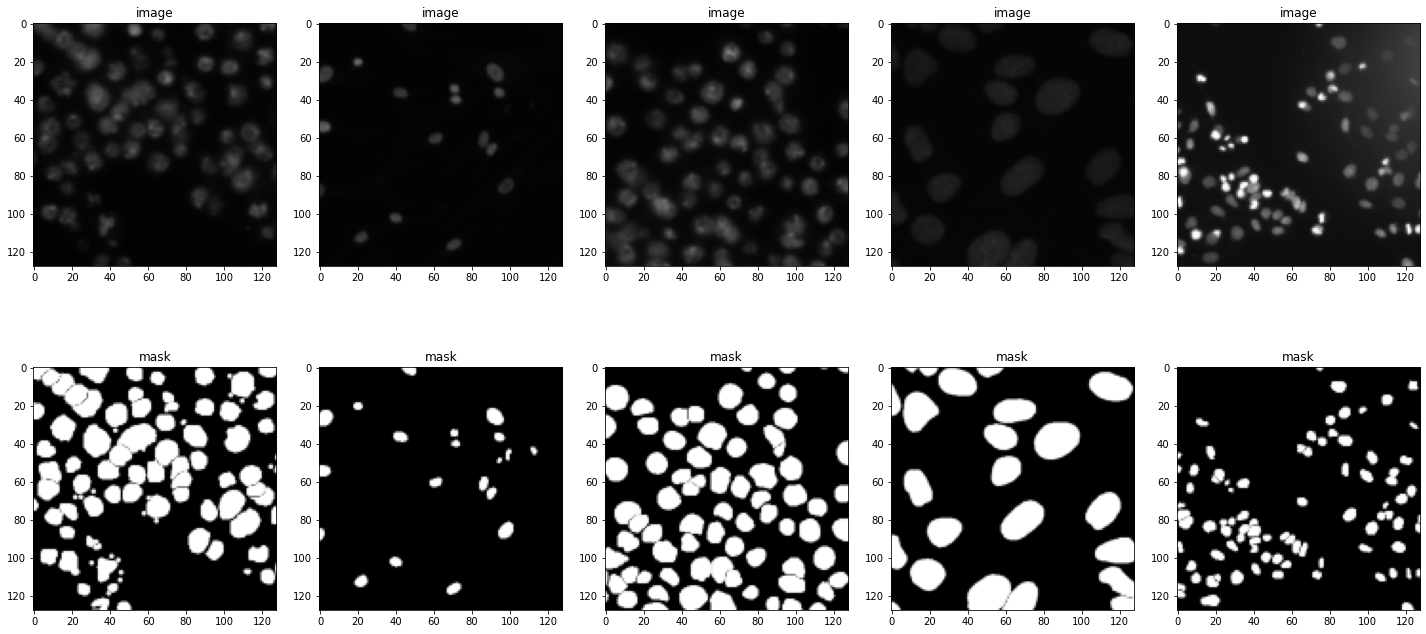

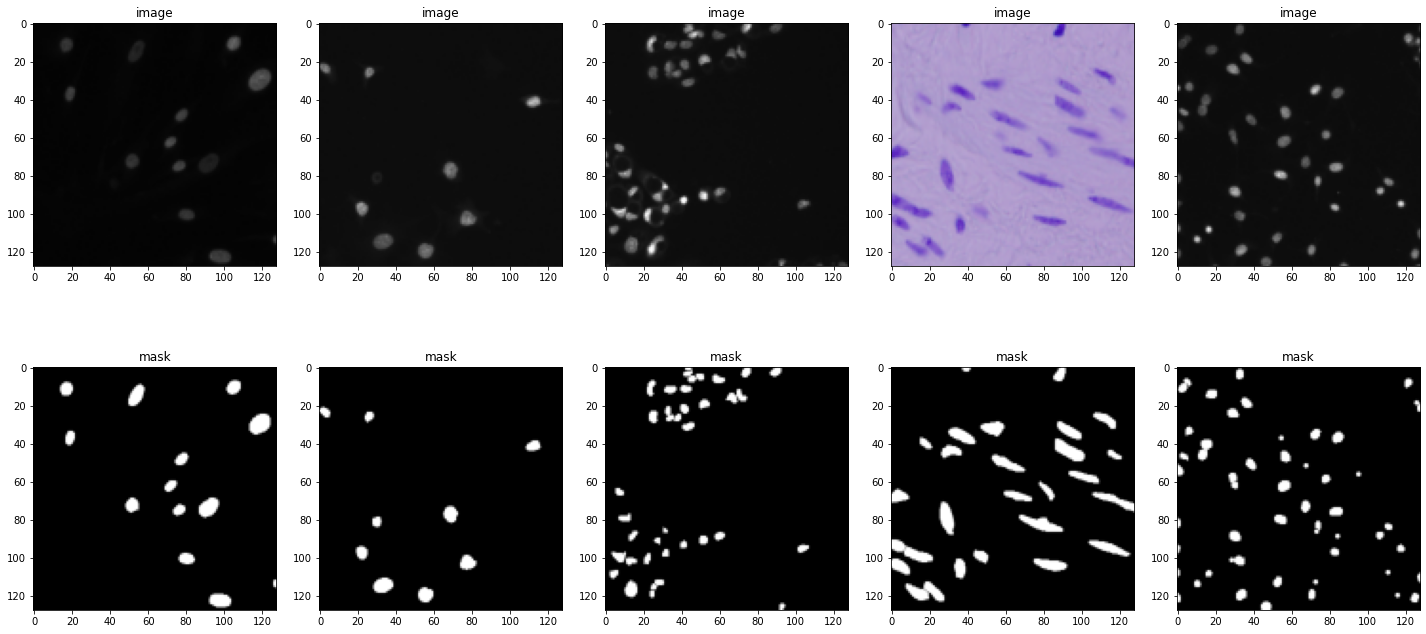

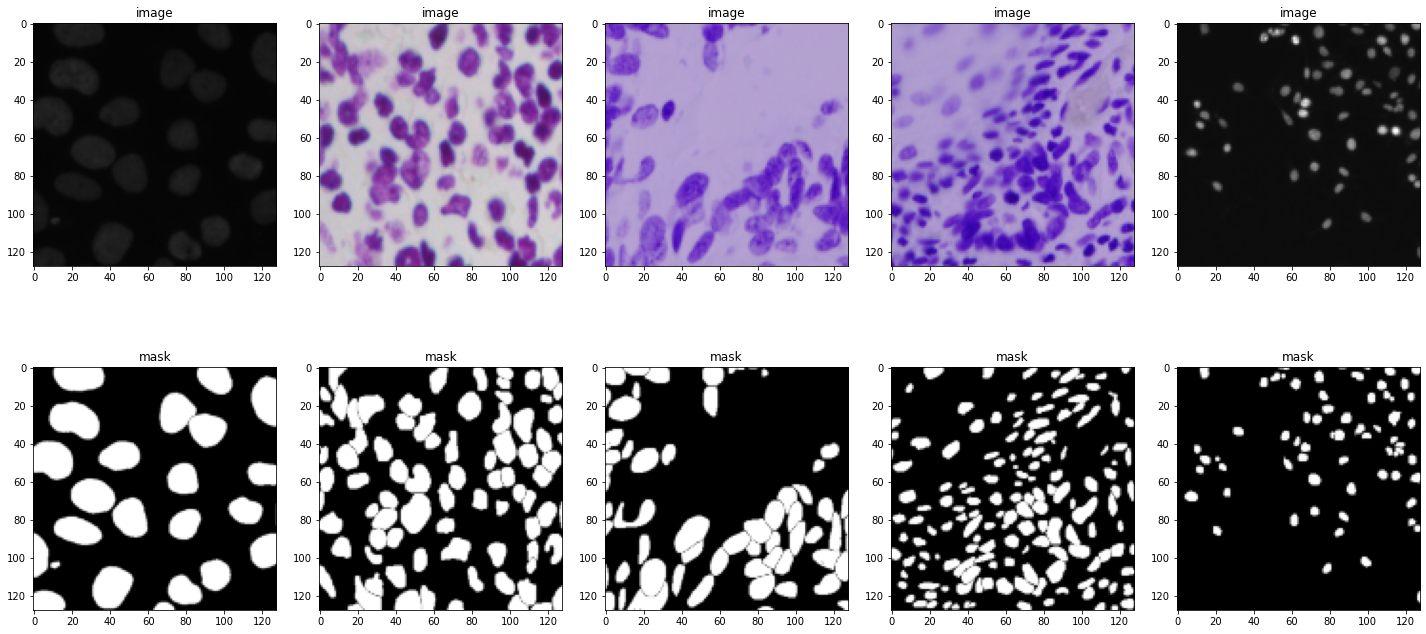

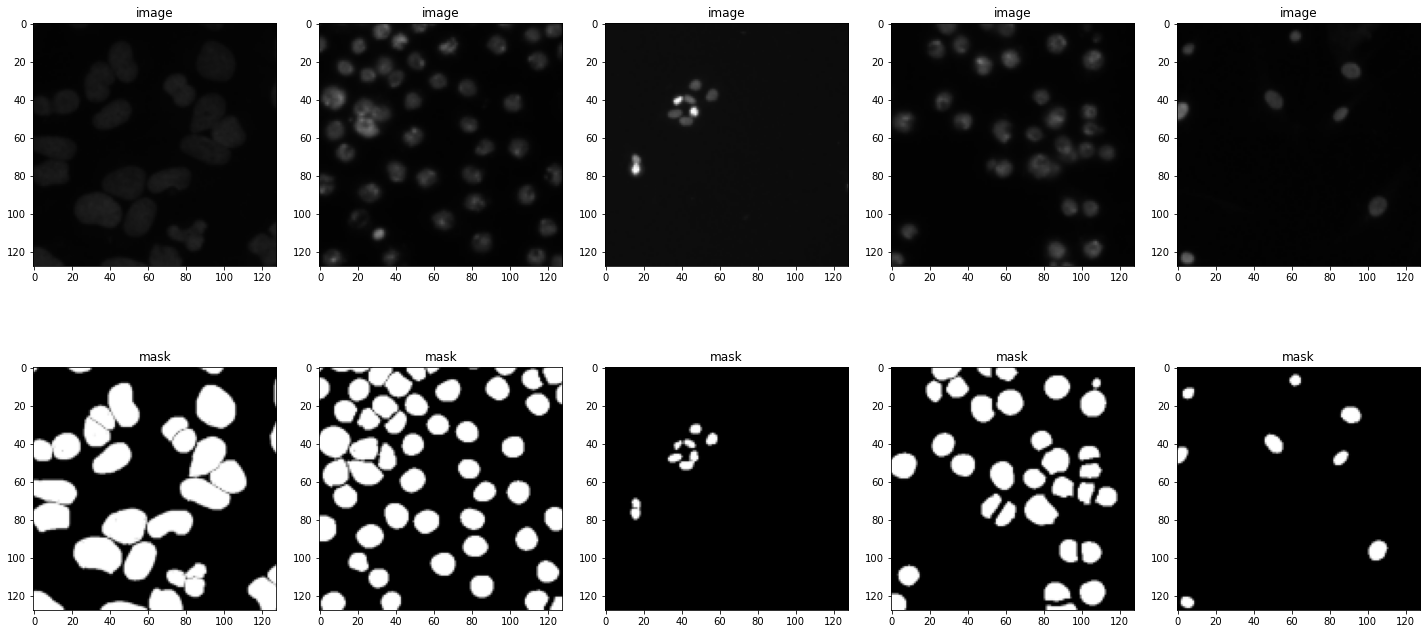

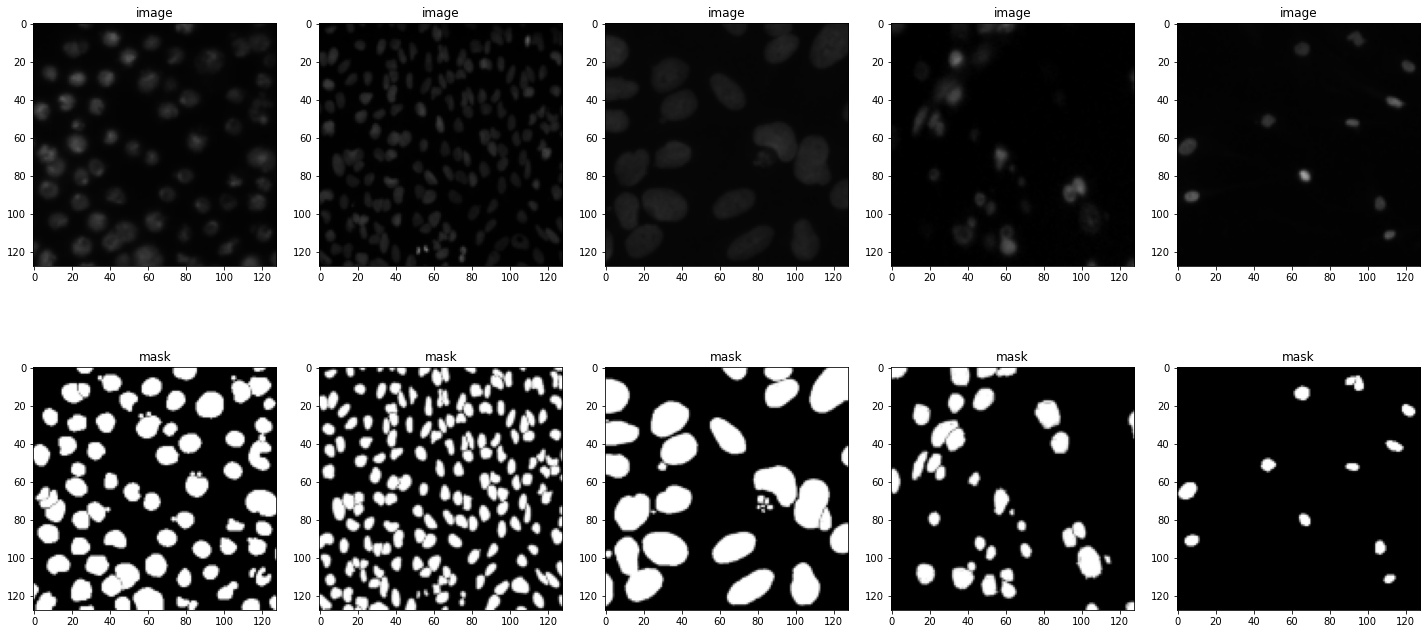

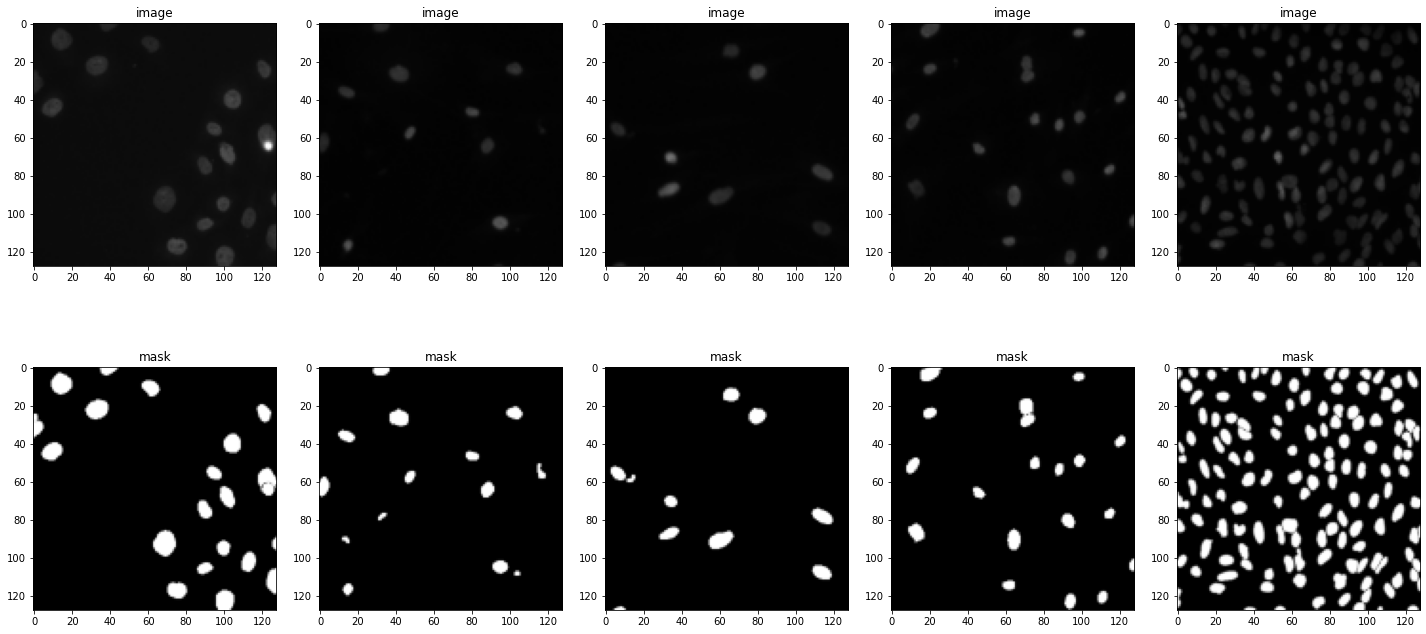

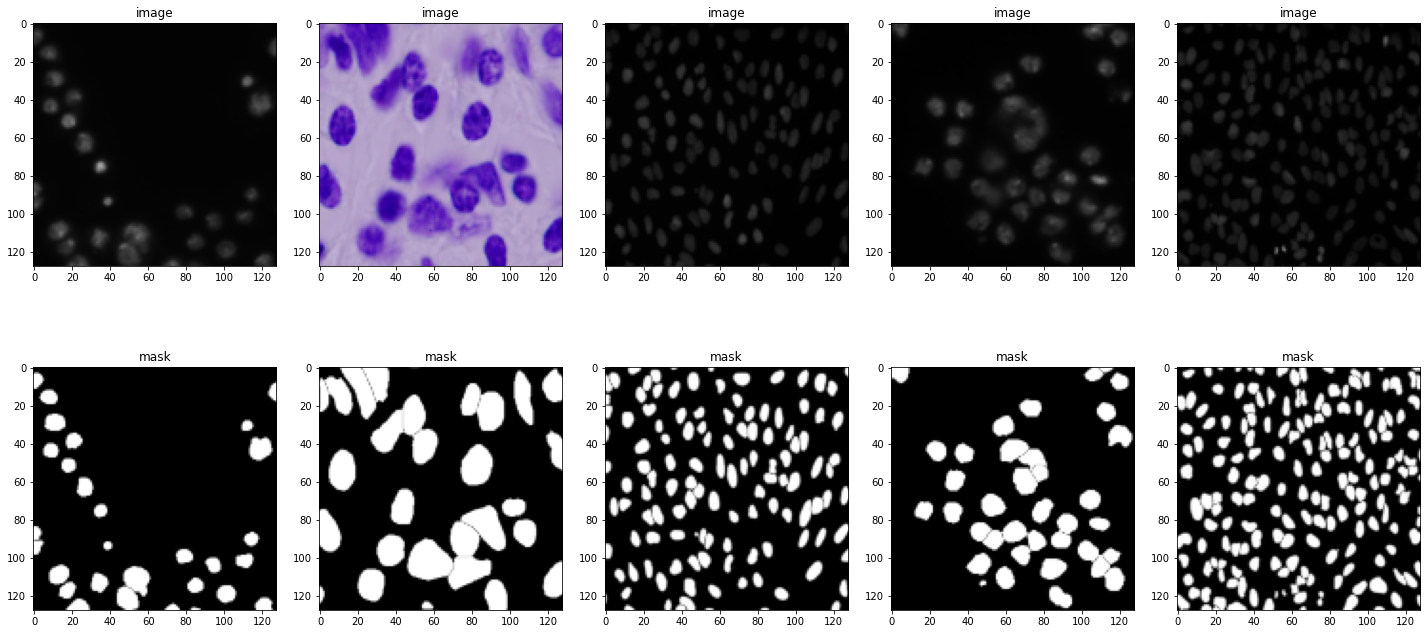

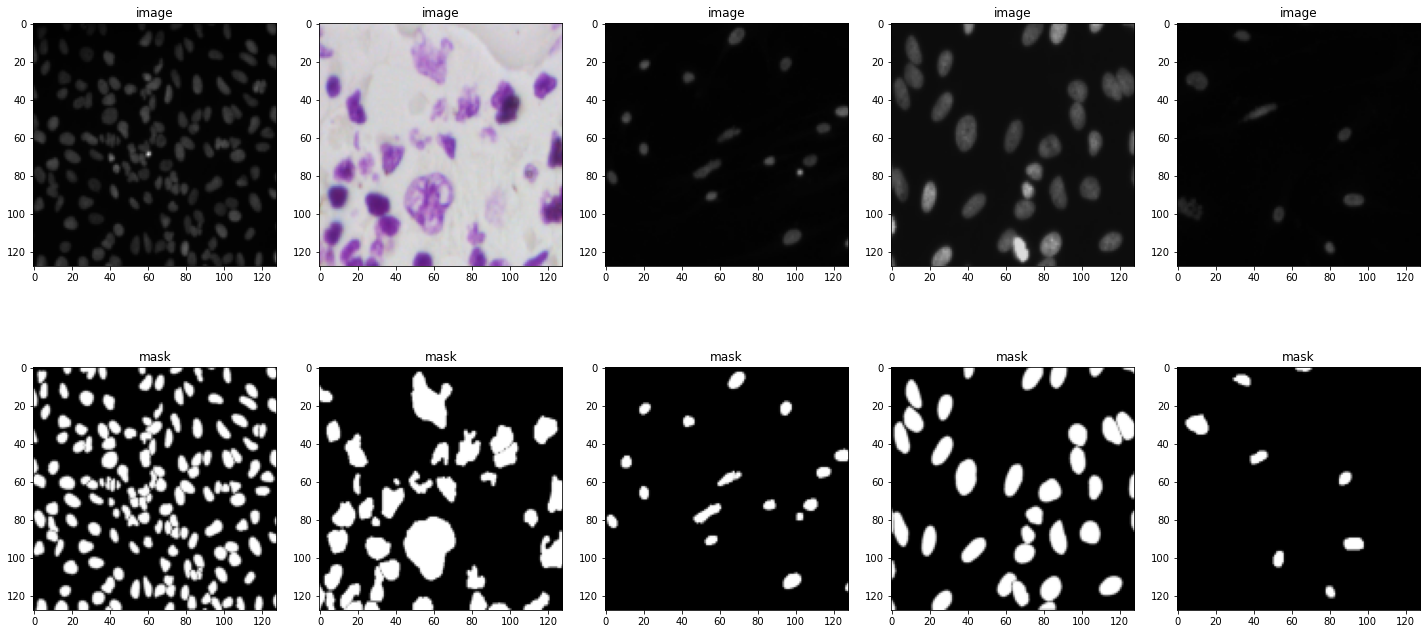

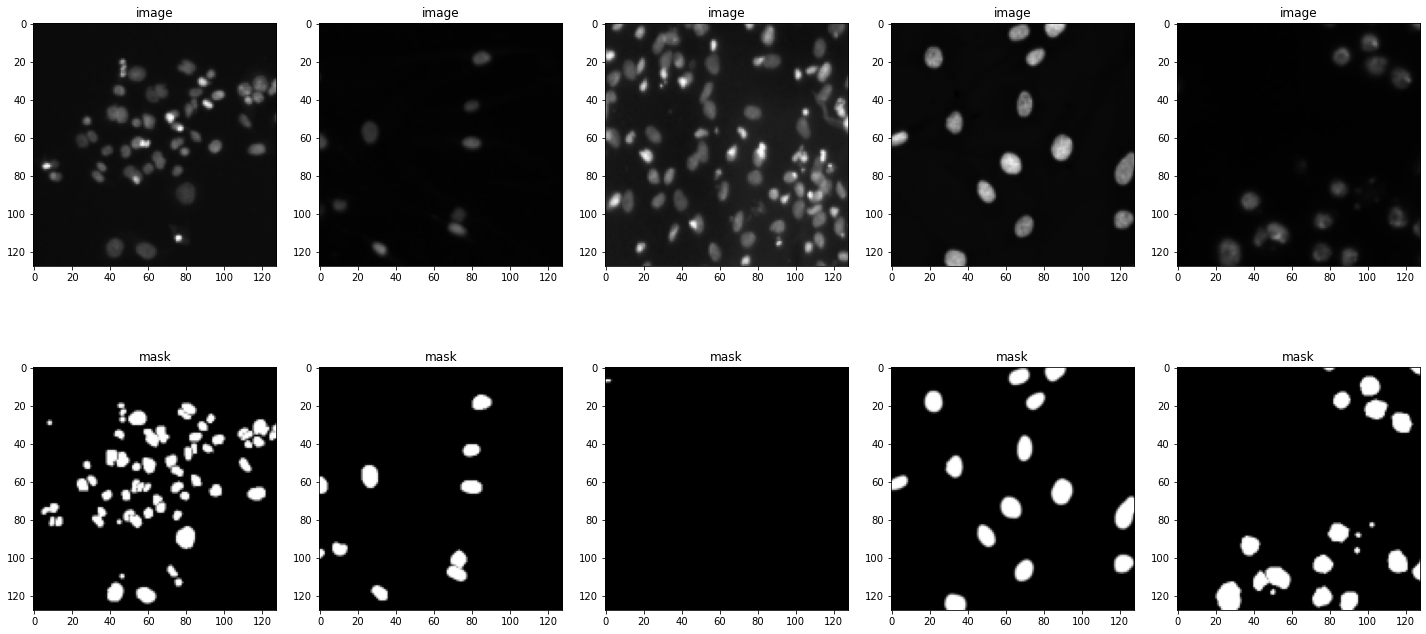

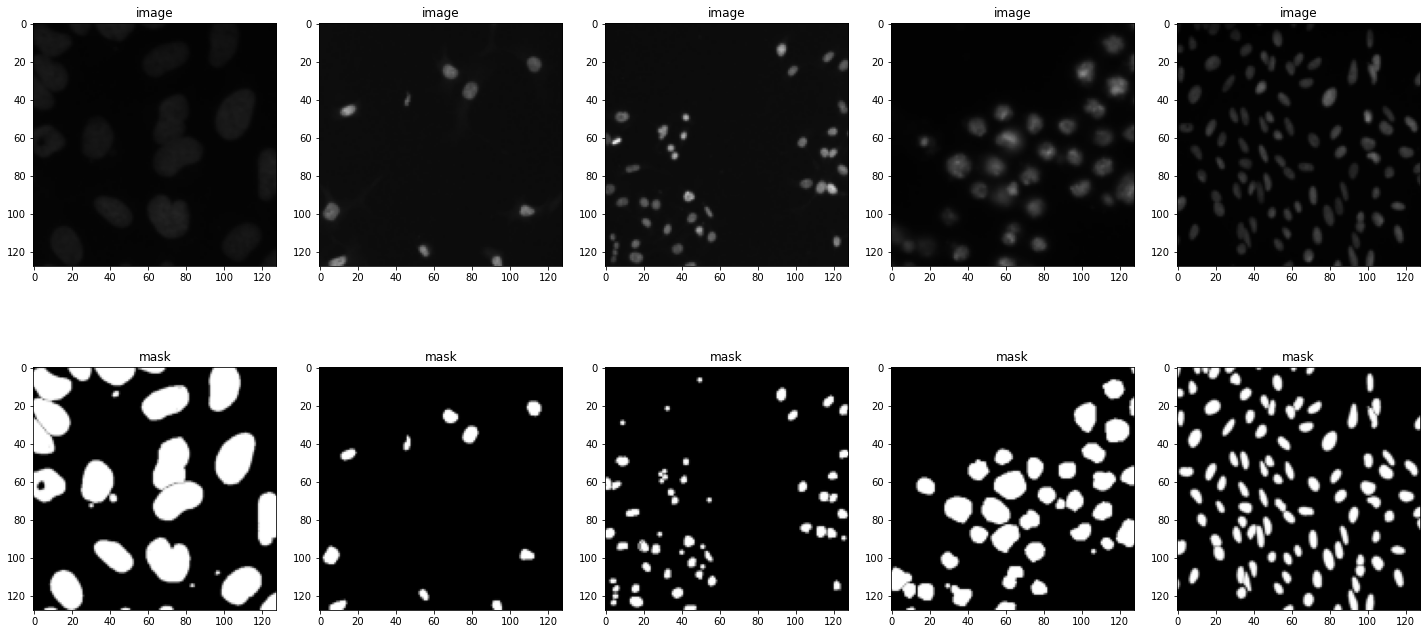

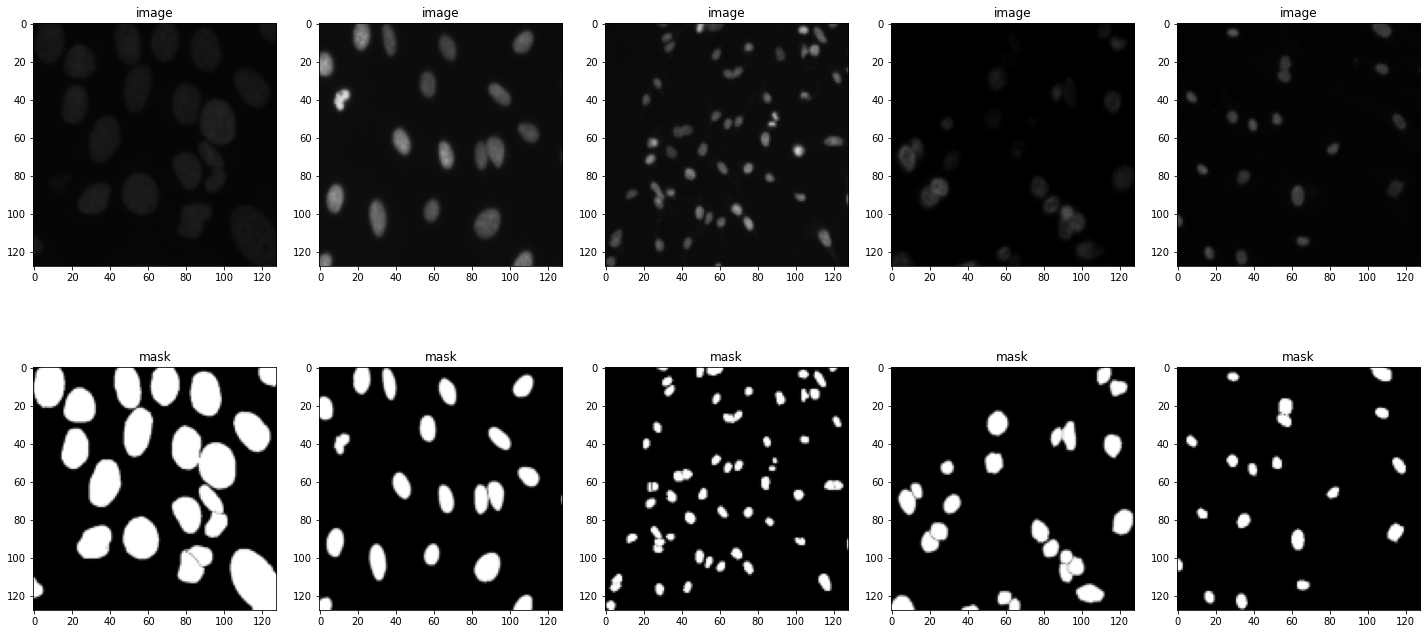

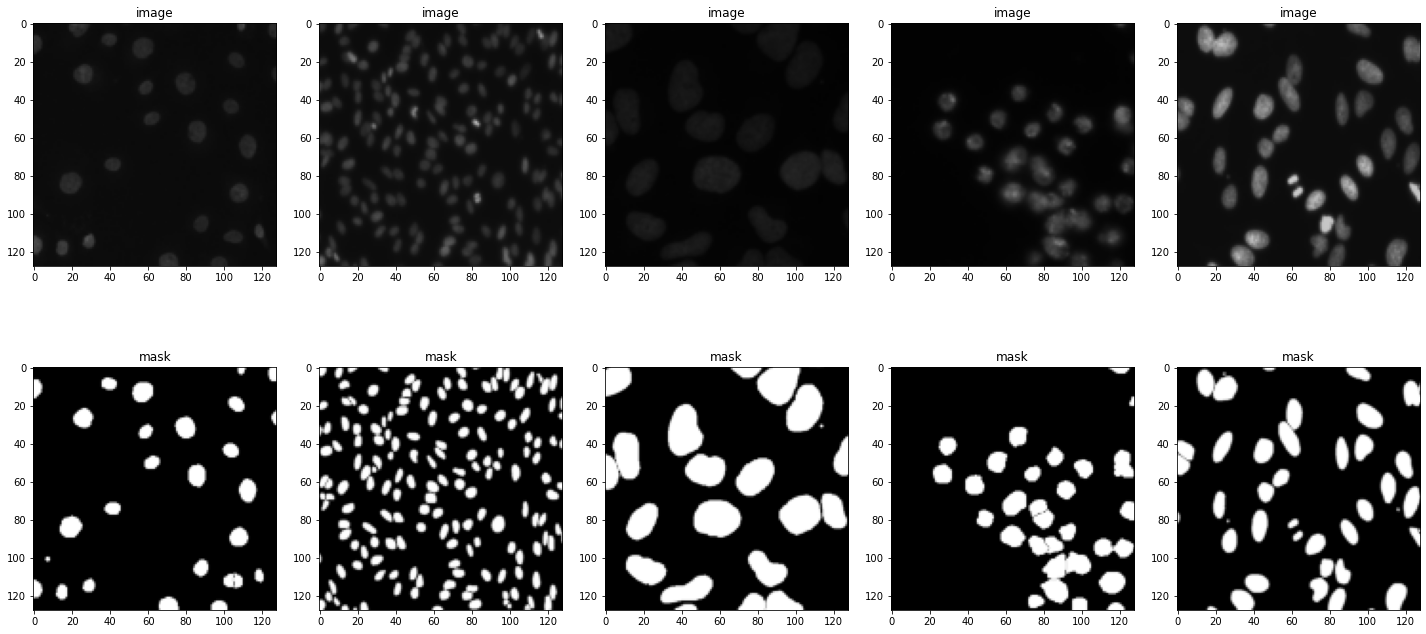

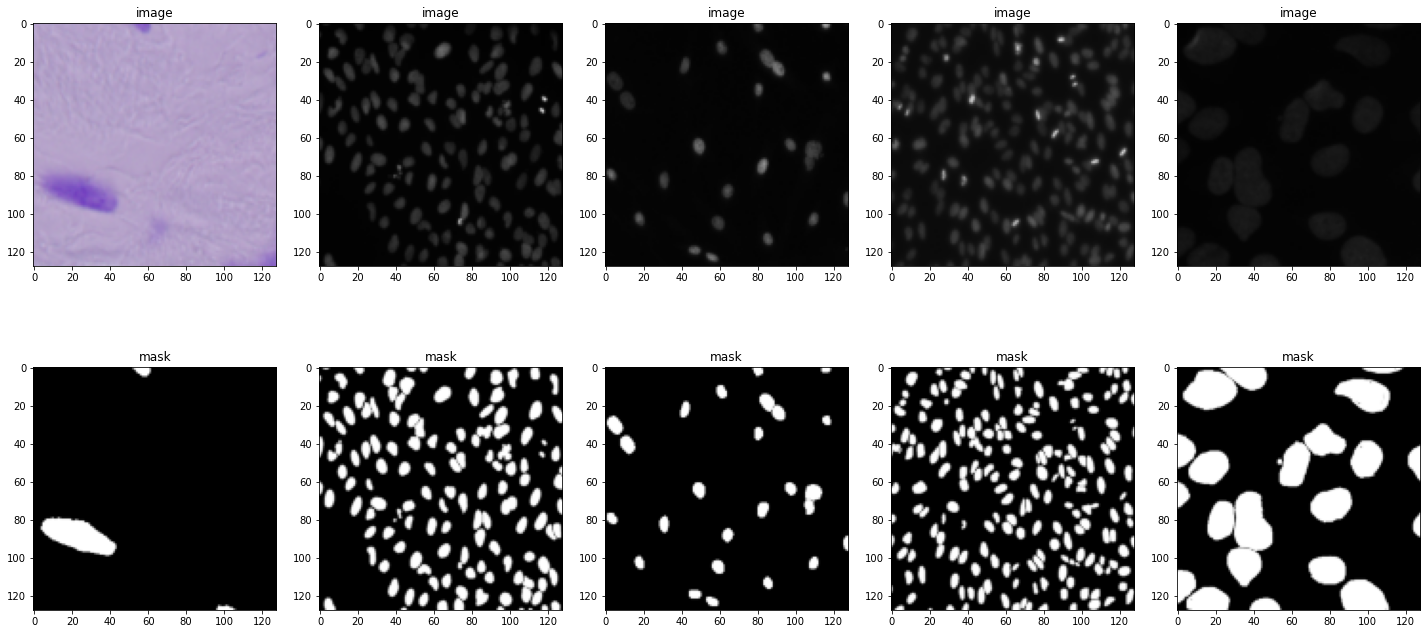

In [25]:
for i in range(20):
    plot_img(5, trainset)
